# Tasca: Aprenentatge No Supervisat - Agrupació

### Càrrega de llibreries

In [1]:
import pandas as pd
import numpy as np
import calendar

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from kneed import KneeLocator

pd.set_option('display.max_columns', None)

### Lectura de la base de dades

In [2]:
# Lectura de dades
dfl = pd.read_csv('DelayedFlights.csv')
dfl[:3]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Tractament de la base de dades

In [3]:
# Es crea una copia del dataset
df = dfl.copy()

In [4]:
# S'elimina la primera columna
df = df.drop(df.columns[0],axis=1)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dimensió del dataset
df.shape

(1936758, 29)

In [6]:
# Quantitat de null de cada variable
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
# S'eliminen les columnes amb més de 500000 valors nuls
df_2 = df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [8]:
# S'eliminen totes les observacions amb algun registre nul
df_2 = df_2.dropna(axis=0, how='any')
df_2.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [9]:
# Dimensions de la base de dades
df_2.shape

(1928368, 24)

<span style='color:blue;font-size:18px'> <b> Eliminació de variables </b> </span>

In [10]:
# Descriptiu de les variables numèriques
df_2.describe().round(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,1928368.0,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.000,1928368.0,1928368.0
mean,2008.0,6.108,15.752,3.985,1518.648,1467.717,1610.242,1634.196,2184.292,133.306,134.198,108.277,42.200,43.092,764.949,6.811,18.217,0.0,0.0
std,0.0,3.481,8.777,1.996,450.436,424.728,548.001,464.629,1944.448,72.060,71.233,68.643,56.784,53.266,573.886,5.268,14.308,0.0,0.0
min,2008.0,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-21.000,0.000,-109.000,6.000,11.000,0.000,0.000,0.0,0.0
25%,2008.0,3.000,8.000,2.000,1203.000,1135.000,1316.000,1325.000,611.000,80.000,82.000,58.000,9.000,12.000,338.000,4.000,10.000,0.0,0.0
50%,2008.0,6.000,16.000,4.000,1545.000,1510.000,1715.000,1705.000,1543.000,116.000,116.000,90.000,24.000,24.000,606.000,6.000,14.000,0.0,0.0
75%,2008.0,9.000,23.000,6.000,1900.000,1815.000,2030.000,2014.000,3423.000,165.000,165.000,137.000,56.000,53.000,997.000,8.000,21.000,0.0,0.0
max,2008.0,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,9741.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,0.0,0.0


In [11]:
# Descriptiu de les variables categòriques
df_2.describe(include='object')

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1928368,1928368,1928368,1928368,1928368
unique,20,5360,303,302,1
top,WN,N325SW,ATL,ORD,N
freq,376201,961,131213,108265,1928368


In [12]:
# La variable 'FlightNum' es tracta d'una variable categòrica encara que s'hagi importat com a numèrica.
# Es calcula el nombre de categories de la variable
len(df_2['FlightNum'].unique())

7498

In [13]:
# S'eliminen les variables categòriques DayofMonth, TailNum i FlightNum per tenir moltes categories.
df_2 = df_2.drop(['TailNum', 'DayofMonth','FlightNum'], axis=1)

In [14]:
# S'eliminen les variables Cancelled, Diverted, CancellationCode i Year porquè només tenen un únic valor.
df_2 = df_2.drop(['Year', 'Cancelled', 'Diverted', 'CancellationCode'], axis=1)

In [15]:
# S'eliminen les variables CRSElapsedTime, DepTime, ArrTime i CRSArrTime perquè es considera que no serveixen.
df_2 = df_2.drop(['CRSElapsedTime', 'DepTime', 'ArrTime', 'CRSArrTime'], axis=1)

In [16]:
# S'elimina la variable ActualElapsedTime perquè es combinació lineal d'altres
df_2 = df_2.drop(['ActualElapsedTime'], axis=1)

In [17]:
# Es crea una copia
df_3 = df_2.copy()

In [18]:
# Dataset fins el moment
df_3.head()

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,1,4,1955,WN,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0
1,1,4,735,WN,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0
2,1,4,620,WN,76.0,14.0,8.0,IND,BWI,515,3.0,17.0
3,1,4,1755,WN,77.0,34.0,34.0,IND,BWI,515,3.0,10.0
4,1,4,1915,WN,87.0,11.0,25.0,IND,JAX,688,4.0,10.0


### Selecció de la mostra

In [19]:
# Dimensions
df_3.shape

(1928368, 12)

<span style='color:blue;font-size:15px'> Com que la base de dades és massa gran, es decideix obtenir una mostra de 10000 observacions. El métode de mostreig escollit és l'aleatori simple, encara que caldria estudiar si alguna de les variables restants serviria per a estratificar la mostra. </span>

In [20]:
# Mostra aleatoria simple de 10000 observacions
k = 10000
dfs = df_3.sample(k,random_state=1234)

### Creació de noves variables

In [21]:
# Variable Velocitat Mitja, que és la divisió entre la distancia (en milles) i el temps (en hores).
dfs['VelMitja'] = round(dfs['Distance']/(dfs['AirTime']/60),2)
dfs.head()

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,VelMitja
276255,2,4,1815,US,98.0,21.0,31.0,CLT,BOS,728,7.0,12.0,445.71
1253643,7,5,730,CO,191.0,0.0,6.0,JFK,IAH,1417,8.0,24.0,445.13
607829,4,5,845,XE,30.0,72.0,47.0,EWR,ALB,143,4.0,65.0,286.00
1059724,6,3,1912,AS,33.0,45.0,34.0,SIT,JNU,95,3.0,17.0,172.73
407269,3,5,1810,WN,72.0,18.0,21.0,LAS,SMF,397,3.0,12.0,330.83


In [22]:
# S'eliminen les variables AirTime i Distance.
dfs = dfs.drop(['AirTime','Distance'],axis=1)

In [23]:
# Es recodifica la variable Month per crear després variables dummy 
months = []
for i in dfs['Month']:
     months.append(calendar.month_name[i])
        
dfs['Month'] = months

In [24]:
# Es recodifica la variable DayOfWeek per crear després variables dummy
days = []
for i in dfs['DayOfWeek']:
     days.append(calendar.day_name[i-1])
        
dfs['DayOfWeek'] = days

In [25]:
# S'utilitza la variable CRSDepTime per crear una nova variable que indica si el vol programat surt de matí (de 4:01 a 12:00), 
# de tarda (de 12:00 a 20:00) o de nit (de 20:01 a 4:00)
dfs['Sortida'] = np.where((dfs['CRSDepTime'] > 1200) & (dfs['CRSDepTime'] <= 2000), 'Tarda',
                               np.where((dfs['CRSDepTime'] > 400) & (dfs['CRSDepTime'] <= 1200), 'Mati', 'Nit'))

In [26]:
# S'elimina la variables CRSDepTime.
dfs = dfs.drop(['CRSDepTime'],axis=1)

In [27]:
dfs.head()

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,VelMitja,Sortida
276255,February,Thursday,US,21.0,31.0,CLT,BOS,7.0,12.0,445.71,Tarda
1253643,July,Friday,CO,0.0,6.0,JFK,IAH,8.0,24.0,445.13,Mati
607829,April,Friday,XE,72.0,47.0,EWR,ALB,4.0,65.0,286.00,Mati
1059724,June,Wednesday,AS,45.0,34.0,SIT,JNU,3.0,17.0,172.73,Tarda
407269,March,Friday,WN,18.0,21.0,LAS,SMF,3.0,12.0,330.83,Tarda


### Preprocessat

In [28]:
# Es crea una copia
df_escalado = dfs.copy()

In [29]:
# Escalat de les dades numériques: estandarització
atributos = ['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'VelMitja']
scaler = StandardScaler()
df_escalado[atributos] = scaler.fit_transform(df_escalado[atributos].values)

In [30]:
# Dataframe escalat
df_escalado.head()

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,VelMitja,Sortida
276255,February,Thursday,US,-0.382913,-0.234960,CLT,BOS,0.029360,-0.428760,0.643545,Tarda
1253643,July,Friday,CO,-0.746208,-0.697855,JFK,IAH,0.206869,0.393617,0.636010,Mati
607829,April,Friday,XE,0.499375,0.061293,EWR,ALB,-0.503166,3.203402,-1.431300,Mati
1059724,June,Wednesday,AS,0.032281,-0.179412,SIT,JNU,-0.680675,-0.086103,-2.902827,Tarda
407269,March,Friday,WN,-0.434812,-0.420118,LAS,SMF,-0.680675,-0.428760,-0.848898,Tarda


In [31]:
# Es creen les variables dummy per a les categòriques
df_final = pd.get_dummies(df_escalado)

In [32]:
df_final.head()

,ArrDelay,DepDelay,TaxiIn,TaxiOut,VelMitja,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACT,Origin_ACV,Origin_AGS,Origin_AKN,Origin_ALB,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWR,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTR,Origin_HDN,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITO,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIT,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_SUN,Origin_SWF,Origin_SYR,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_ALB,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BQK,Dest_BQN,Dest_BRO,Dest_BRW,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,Dest_CAE,Dest_CAK,Dest_CDC,Dest_CDV,Dest_CEC,Dest_CHA,Dest_CHO,Dest_CHS,Dest_CIC,Dest_CID,Dest_CLD,Dest_CLE,Dest_CLL,D

In [33]:
# Dimensió del dataset final
df_final.shape

(10000, 567)

### Anàlisi de Components Principals (PCA)

In [34]:
pca = PCA(random_state=1234)
# S'aplica l' ACP
pca.fit(df_final)
print('Nombre de components: ', pca.n_components_)

Nombre de components:  567


In [35]:
# Suma de la variància explicada
tot = sum(pca.explained_variance_)
tot

10.189484448444844

In [36]:
# Percentatges de variància explicada
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[20.18526202952865, 10.013250988059552, 9.693506602888617, 9.47581301022006, 3.8291215860550265]


In [37]:
# Variància explicada acumulada
cum_var_exp = np.cumsum(var_exp)

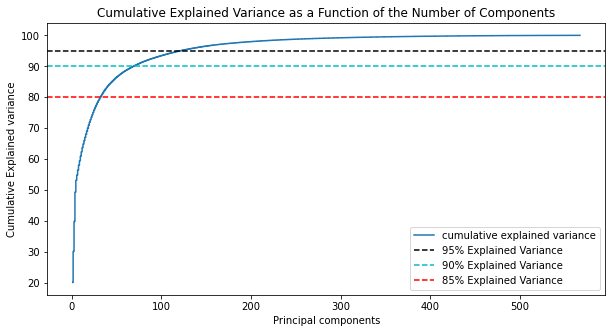

In [38]:
# Gràfric del percentatge de variància acumulada
plt.figure(figsize=(10, 5))
plt.step(range(1, 568), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 80, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [39]:
# Nombre de compoments per arribar al % de variancia explicada corresponent
componentsVariance = [568, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 80) + 1]
print('Nombre de components per arribar al 100% de la variancia explicada: ', componentsVariance[0])
print('Nombre de components per arribar al 99% de la variancia explicada: ', componentsVariance[1])
print('Nombre de components per arribar al 95% de la variancia explicada: ', componentsVariance[2])
print('Nombre de components per arribar al 90% de la variancia explicada: ', componentsVariance[3])
print('Nombre de components per arribar al 80% de la variancia explicada: ', componentsVariance[4])

Nombre de components per arribar al 100% de la variancia explicada:  568
Nombre de components per arribar al 99% de la variancia explicada:  274
Nombre de components per arribar al 95% de la variancia explicada:  121
Nombre de components per arribar al 90% de la variancia explicada:  69
Nombre de components per arribar al 80% de la variancia explicada:  32


In [40]:
# Percentatges de variància explicada per les dues primeres components
pca.explained_variance_ratio_[:2]

array([0.20185262, 0.10013251])

In [41]:
# Percentatge acumulat de variància explicada per les dues primeres components
sum(pca.explained_variance_ratio_[:2])

0.30198513017588213

## Exercici 1
__Classifica els diferents vols utilitzant l'algorisme de K-means.__

In [42]:
# S'aplica el PCA amb 32 components (80% de la variància explicada)
pca_32 = PCA(n_components = 32, random_state=1234)
pca_32.fit(df_final)
pca_32_df = pca_32.transform(df_final)

<span style='color:blue;font-size:20px'> <b> Aplicació del mètode del colze (Elbow Method) per obtenir k </b> </span>

In [43]:
# Paràmetres del k-means
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 1234,}

# Llista dels SSE (Suma dels quadrats dels errors) para cada k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_32_df)
    sse.append(kmeans.inertia_)

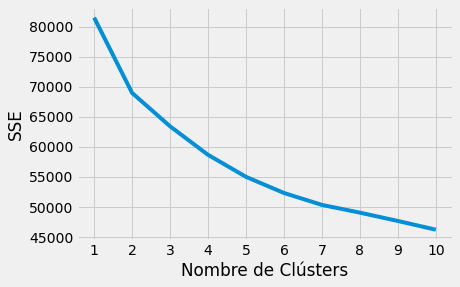

In [44]:
# Representació gràfica
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de Clústers")
plt.ylabel("SSE")
plt.show()

In [45]:
# Forma automàtica d'escollir K mitjançant Elbow Method
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('Nombre de clústers recomanat:', kl.elbow)

Nombre de clústers recomanat: 4


<span style='color:blue'> Segons el gràfic i KneeLocator, un nombre de clústers adient és de k=4 </span>

<span style='color:blue;font-size:20px'> <b> Aplicació del k-means amb k=4 </b> </span>

In [46]:
# S'aplica el k-means amb 4 clústers
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 1234,}
kmeans_4 = KMeans(n_clusters=4, **kmeans_kwargs)
pca_32_kmeans = kmeans_4.fit(pca_32_df)

<span style='color:blue;font-size:20px'> <b> Representació 2D dels clústers </b> </span>

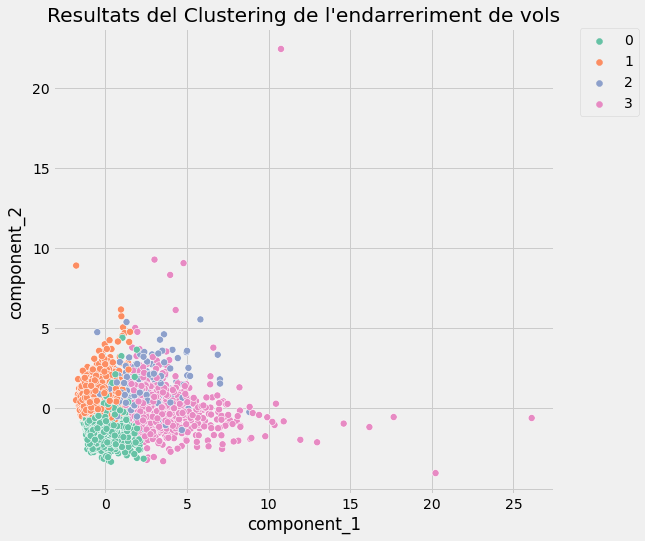

In [47]:
# S'agafen les dues primeres components principals
pcadf = pd.DataFrame(
     pca_32_df[:,:2],
     columns=["component_1", "component_2"],
)

pcadf["cluster"] = pca_32_kmeans.labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=50,
    data=pcadf,
    hue="cluster",
    palette="Set2",
)

scat.set_title(
    "Resultats del Clustering de l'endarreriment de vols"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

<span style='color:blue;font-size:20px'> <b> Assignació de Clústers al dataframe original </b> </span>

In [48]:
pcadf.head()

,component_1,component_2,cluster
0,-0.575894,0.410088,1
1,-0.913484,0.860092,1
2,1.205720,-0.400694,2
3,0.110689,-2.584828,0
4,-0.716488,-1.171581,0


In [49]:
# Es tornen els index al valors per defecte (0,1,2,...)
dfs_2 = dfs.reset_index()

In [50]:
# S'uneixen la taula original (abans de preprocessar) i la taula PCA
df_final_2 = dfs_2.join(pcadf)
df_final_2 = df_final_2.drop('index',axis=1)
df_final_2.head()

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,VelMitja,Sortida,component_1,component_2,cluster
0,February,Thursday,US,21.0,31.0,CLT,BOS,7.0,12.0,445.71,Tarda,-0.575894,0.410088,1
1,July,Friday,CO,0.0,6.0,JFK,IAH,8.0,24.0,445.13,Mati,-0.913484,0.860092,1
2,April,Friday,XE,72.0,47.0,EWR,ALB,4.0,65.0,286.00,Mati,1.205720,-0.400694,2
3,June,Wednesday,AS,45.0,34.0,SIT,JNU,3.0,17.0,172.73,Tarda,0.110689,-2.584828,0
4,March,Friday,WN,18.0,21.0,LAS,SMF,3.0,12.0,330.83,Tarda,-0.716488,-1.171581,0


<span style='color:blue;font-size:20px'> <b> Anàlisi descriptiu de cada clúster </b> </span>

In [51]:
# Es divideix el dataset en 4, segons el clúster assignat
nivells_cluster = df_final_2['cluster'].unique()
df_ad = []
for i in nivells_cluster:
     df_ad.append(df_final_2[df_final_2['cluster']==i])

<span style='color:blue;font-size:18px'> <b> Variables categòriques: Freqüència relativa </b> </span>

<span style='color:blue;font-size:16px'> <b> Mesos </b> </span>

In [52]:
# Ordenació dels mesos
mes_ord = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
order = {key: i for i, key in enumerate(mes_ord)}

In [53]:
# Càlcul de les freqüencies relatives ordenat per mes
mesos = []
for i in range(len(df_ad)):
    mesos.append((df_ad[i]['Month'].groupby(df_ad[i]['Month']).count()/(len(df_ad[i]['Month']))).reset_index(name='Freq').sort_values(by = ['Month'], key = lambda x: x.map(order)))

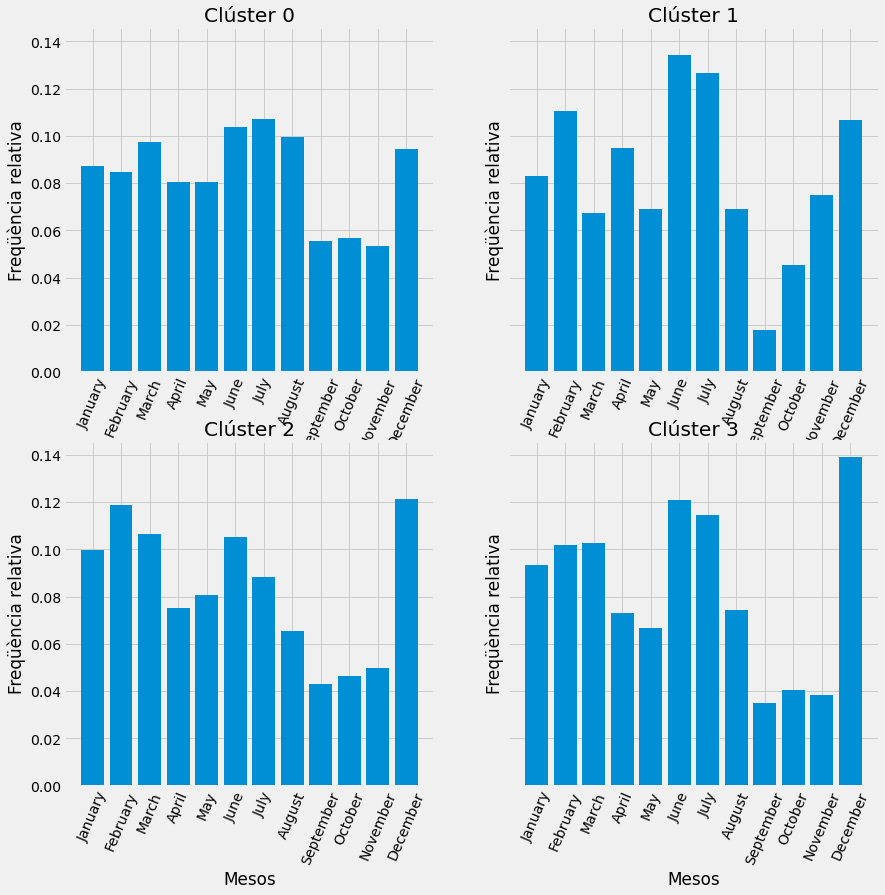

In [54]:
# Barplot de la freqüència relativa dels mesos
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(13,13))
axs[0, 0].bar(mesos[0].Month, mesos[0].Freq)
axs[0, 0].set_title('Clúster 0')
axs[0, 1].bar(mesos[1].Month, mesos[1].Freq)
axs[0, 1].set_title('Clúster 1')
axs[1, 0].bar(mesos[2].Month, mesos[2].Freq)
axs[1, 0].set_title('Clúster 2')
axs[1, 1].bar(mesos[3].Month, mesos[3].Freq)
axs[1, 1].set_title('Clúster 3')

for ax in axs.flat:
    ax.set(xlabel='Mesos', ylabel='Freqüència relativa')
    plt.setp(ax.get_xticklabels(), rotation=67)

<span style='color:blue'> En el clúster 0 apareixen els mesos d'estiu amb més freqüència. El clúster 1 té les les freqüències de Juny i Juliol més altes. En el clúster 2 apareixen els mesos d'hivern amb més freqüència. El clúster 3 apareixen els mesos de vacances amb més freqüència. </span>

<span style='color:blue;font-size:16px'> <b> Dies de la setmana </b> </span>

In [55]:
# Ordenació dels mesos
dia_ord = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
order = {key: i for i, key in enumerate(dia_ord)}

In [56]:
# Càlcul de les freqüencies relatives ordenat per dia
dies = []
for i in range(len(df_ad)):
    dies.append((df_ad[i]['DayOfWeek'].groupby(df_ad[i]['DayOfWeek']).count()/(len(df_ad[i]['DayOfWeek']))).reset_index(name='Freq').sort_values(by = ['DayOfWeek'], key = lambda x: x.map(order)))

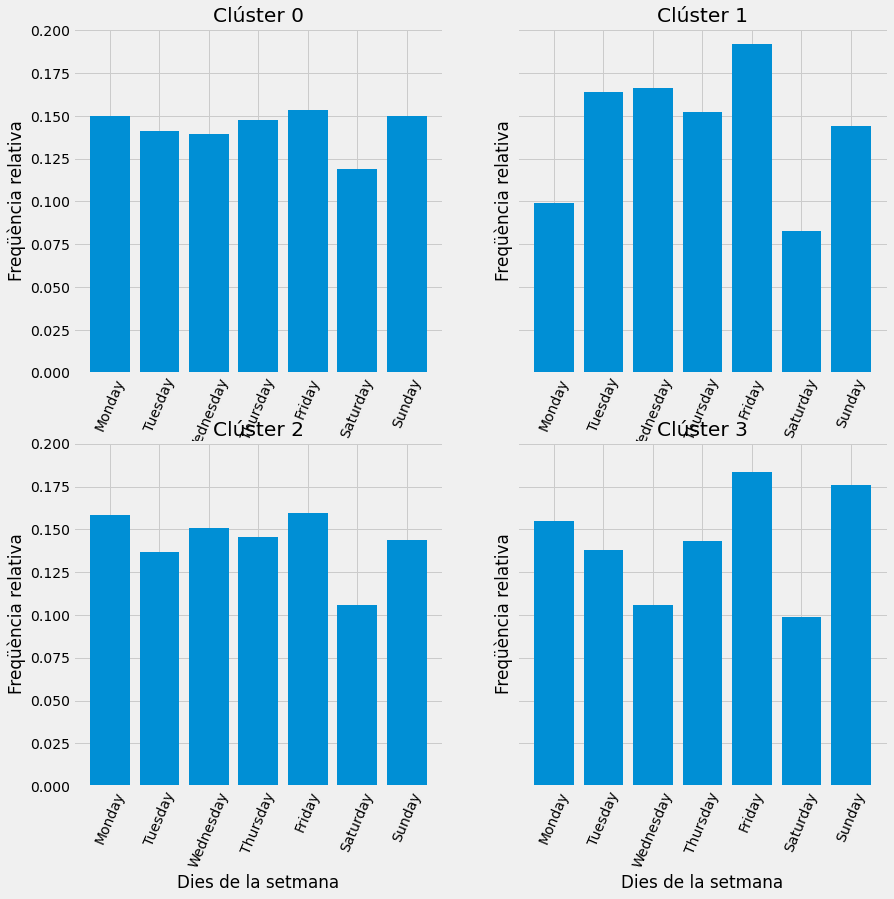

In [57]:
# Barplot de la freqüència relativa dels dies
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(13,13))
axs[0, 0].bar(dies[0].DayOfWeek, dies[0].Freq)
axs[0, 0].set_title('Clúster 0')
axs[0, 1].bar(dies[1].DayOfWeek, dies[1].Freq)
axs[0, 1].set_title('Clúster 1')
axs[1, 0].bar(dies[2].DayOfWeek, dies[2].Freq)
axs[1, 0].set_title('Clúster 2')
axs[1, 1].bar(dies[3].DayOfWeek, dies[3].Freq)
axs[1, 1].set_title('Clúster 3')

for ax in axs.flat:
    ax.set(xlabel='Dies de la setmana', ylabel='Freqüència relativa')
    plt.setp(ax.get_xticklabels(), rotation=67)

<span style='color:blue'> En tots els casos el dia més freqüent és divendres, destacant els clústers 1 i 3.  </span>

<span style='color:blue;font-size:16px'> <b> Aerolínies </b> </span>

In [58]:
# Càlcul de les freqüencies relatives
UC = []
for i in range(len(df_ad)):
    UC.append((df_ad[i]['UniqueCarrier'].groupby(df_ad[i]['UniqueCarrier']).count()/(len(df_ad[i]['UniqueCarrier']))).reset_index(name='Freq').sort_values(by = ['UniqueCarrier']))

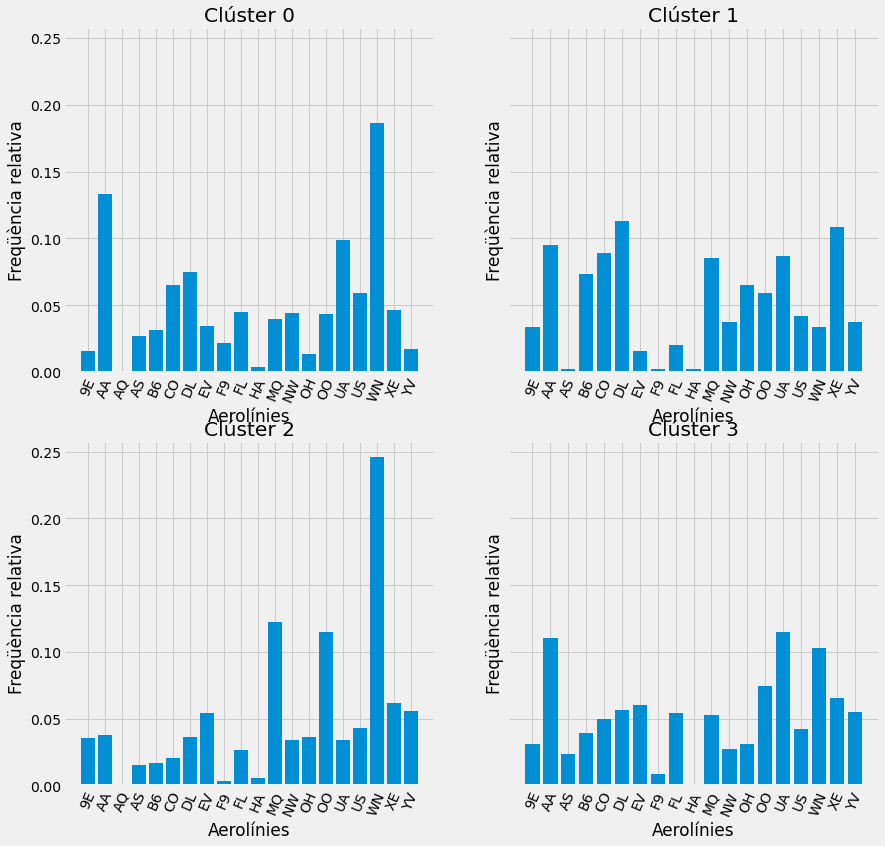

In [59]:
# Barplot de la freqüència relativa de les aerolínies
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(13,13))
axs[0, 0].bar(UC[0].UniqueCarrier, UC[0].Freq)
axs[0, 0].set_title('Clúster 0')
axs[0, 1].bar(UC[1].UniqueCarrier, UC[1].Freq)
axs[0, 1].set_title('Clúster 1')
axs[1, 0].bar(UC[2].UniqueCarrier, UC[2].Freq)
axs[1, 0].set_title('Clúster 2')
axs[1, 1].bar(UC[3].UniqueCarrier, UC[3].Freq)
axs[1, 1].set_title('Clúster 3')

for ax in axs.flat:
    ax.set(xlabel='Aerolínies', ylabel='Freqüència relativa')
    plt.setp(ax.get_xticklabels(), rotation=67)

<span style='color:blue'> En el clúster 0 destaquen les aerolínies WN i AA, aquesta última amb la freqüència relativa més alta que la resta de clústers. En el clúster 1 destaca l'aerolínia DL i XE. En el clúster 2 destaca molt l'aerolínia WN, seguit de MQ i OO. El clúster 3 destaca una mica amb UA. </span>

<span style='color:blue;font-size:16px'> <b> Origen </b> </span>

<span style='color:blue'> Com que es tracta d'una categòrica amb molts nivells, es calcula les 3 freqüències relatives més altes en comptes d'utilizar gràfiques. </span>

In [60]:
# Freqüència relativa de les 3 origens amb més ocurrencies
for i in range(len(df_ad)):
    print((df_ad[i]['Origin'].groupby(df_ad[i]['Origin']).count()/(len(df_ad[i]['Origin']))).sort_values(ascending=False)[:3])
    print('-----')

Origin
ATL    0.077866
ORD    0.066770
DFW    0.063850
Name: Origin, dtype: float64
-----
Origin
JFK    0.148221
ORD    0.120553
EWR    0.110672
Name: Origin, dtype: float64
-----
Origin
ORD    0.056532
ATL    0.050381
DFW    0.031634
Name: Origin, dtype: float64
-----
Origin
ATL    0.085896
ORD    0.084836
DFW    0.036055
Name: Origin, dtype: float64
-----


<span style='color:blue'> Els clústers 0, 2 i 3 són semblants. El clúster 1 és diferent ja que es JFK el que apareix amb més freqüència i apareix EWR. </span>

<span style='color:blue;font-size:16px'> <b> Destinació </b> </span>

<span style='color:blue'> Com que es tracta d'una categòrica amb molts nivells, es calcula les 3 freqüències relatives més altes en comptes d'utilizar gràfiques. </span>

In [61]:
# Freqüència relativa de les 3 destinacions amb més ocurrencies
for i in range(len(df_ad)):
    print((df_ad[i]['Dest'].groupby(df_ad[i]['Dest']).count()/(len(df_ad[i]['Dest']))).sort_values(ascending=False)[:3])
    print('-----')

Dest
ATL    0.052560
DEN    0.042048
ORD    0.038544
Name: Dest, dtype: float64
-----
Dest
ORD    0.094862
EWR    0.065217
ATL    0.055336
Name: Dest, dtype: float64
-----
Dest
ORD    0.063855
ATL    0.062683
DFW    0.032513
Name: Dest, dtype: float64
-----
Dest
ORD    0.100742
ATL    0.080594
EWR    0.044539
Name: Dest, dtype: float64
-----


<span style='color:blue'> En el clúster 3 apareixen ORD i ATL, que tenen la major freqüència de tots els clústers.  </span>

<span style='color:blue;font-size:16px'> <b> Sortida </b> </span>

In [62]:
# Ordenació dels moments del dia
sort_ord = ['Mati', 'Tarda', 'Nit']
order = {key: i for i, key in enumerate(sort_ord)}

In [63]:
# Freqüència relativa de les sortides
sort = []
for i in range(len(df_ad)):
    sort.append((df_ad[i]['Sortida'].groupby(df_ad[i]['Sortida']).count()/(len(df_ad[i]['Sortida']))).reset_index(name='Freq').sort_values(by = ['Sortida'], key = lambda x: x.map(order)))

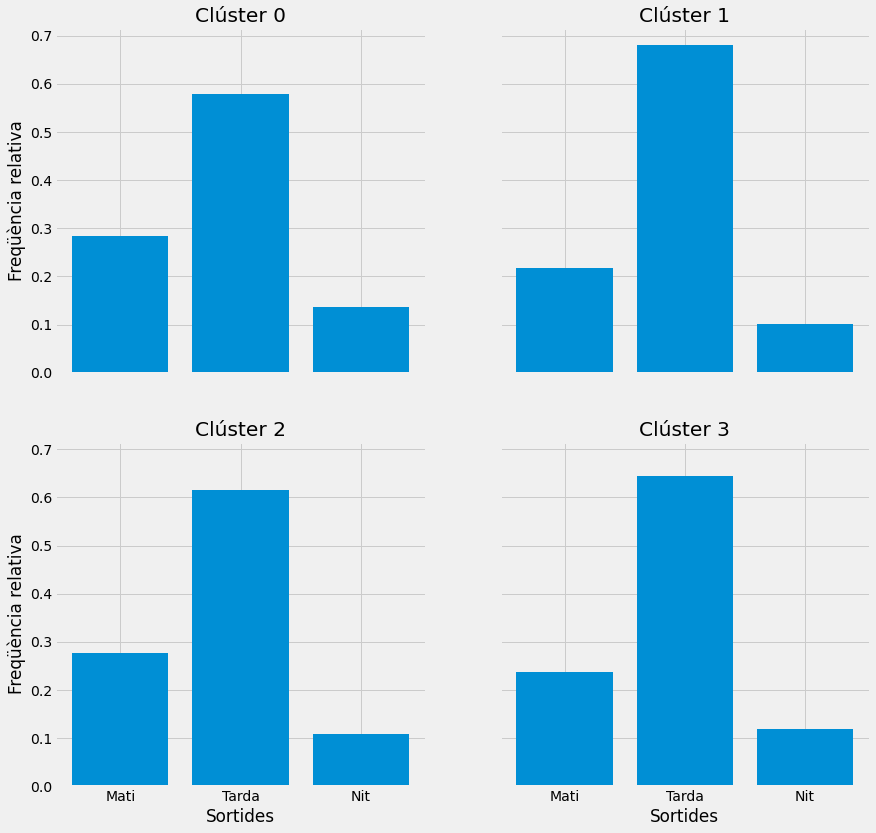

In [64]:
# Barplot de la freqüència relativa de les sortides
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(13,13))
axs[0, 0].bar(sort[0].Sortida, sort[0].Freq)
axs[0, 0].set_title('Clúster 0')
axs[0, 1].bar(sort[1].Sortida, sort[1].Freq)
axs[0, 1].set_title('Clúster 1')
axs[1, 0].bar(sort[2].Sortida, sort[2].Freq)
axs[1, 0].set_title('Clúster 2')
axs[1, 1].bar(sort[3].Sortida, sort[3].Freq)
axs[1, 1].set_title('Clúster 3')

for ax in axs.flat:
    ax.set(xlabel='Sortides', ylabel='Freqüència relativa')
    plt.setp(ax.get_xticklabels(),rotation=0)
    ax.label_outer()

<span style='color:blue'> Els clústers son iguals. Això vol dir que aquesta variable no aporta res al k-means.  </span>

<span style='color:blue;font-size:18px'> <b> Variables numèriques: mitjana i mediana </b> </span>

<span style='color:blue;font-size:16px'> <b> ArrDelay </b> </span>

In [65]:
for i in range(len(df_ad)):
    print('Clúster '+str(i))
    print('Mitjana ArrDelay : ', round(df_ad[i]['ArrDelay'].mean(),2))
    print('Mediana ArrDelay:', (df_ad[i]['ArrDelay'].median()))
    print('-----')

Clúster 0
Mitjana ArrDelay :  21.41
Mediana ArrDelay: 16.0
-----
Clúster 1
Mitjana ArrDelay :  88.11
Mediana ArrDelay: 80.0
-----
Clúster 2
Mitjana ArrDelay :  33.41
Mediana ArrDelay: 26.0
-----
Clúster 3
Mitjana ArrDelay :  172.55
Mediana ArrDelay: 148.0
-----


<span style='color:blue'> El clúster 0 és el que té, en mitjana, menys endarreriment a l'arribada, i el clúster 3 el que més (amb molta diferència).  </span>

<span style='color:blue;font-size:16px'> <b> DepDelay </b> </span>

In [66]:
for i in range(len(df_ad)):
    print('Clúster '+str(i))
    print('Mitjana DepDelay: ', round(df_ad[i]['DepDelay'].mean(),2))
    print('Mediana DepDelay:', (df_ad[i]['DepDelay'].median()))
    print('-----')

Clúster 0
Mitjana DepDelay:  27.41
Mediana DepDelay: 19.0
-----
Clúster 1
Mitjana DepDelay:  48.6
Mediana DepDelay: 40.0
-----
Clúster 2
Mitjana DepDelay:  32.44
Mediana DepDelay: 23.0
-----
Clúster 3
Mitjana DepDelay:  170.47
Mediana DepDelay: 148.0
-----


<span style='color:blue'> El clúster 0 és el que té, en mitjana, menys endarreriment a la sortida, i el clúster 3 el que més (amb molta diferència). Té sentit ja que ArrDelay y DepDelay estan correlacionats linealment. </span>

<span style='color:blue;font-size:16px'> <b> TaxiIn </b> </span>

In [67]:
for i in range(len(df_ad)):
    print('Clúster '+str(i))
    print('TaxiIn: ', round(df_ad[i]['TaxiIn'].mean(),2))
    print('TaxiIn:', (df_ad[i]['TaxiIn'].median()))
    print('-----')

Clúster 0
TaxiIn:  6.65
TaxiIn: 5.0
-----
Clúster 1
TaxiIn:  7.49
TaxiIn: 6.0
-----
Clúster 2
TaxiIn:  6.38
TaxiIn: 5.0
-----
Clúster 3
TaxiIn:  9.13
TaxiIn: 6.0
-----


<span style='color:blue'> El clúster 2 és el que té, en mitjana, menys TaxiIn, i el clúster 3 el que més (amb diferència). </span>

<span style='color:blue;font-size:16px'> <b> TaxiOut </b> </span>

In [68]:
for i in range(len(df_ad)):
    print('Clúster '+str(i))
    print('TaxiOut: ', round(df_ad[i]['TaxiOut'].mean(),2))
    print('TaxiOut:', (df_ad[i]['TaxiOut'].median()))
    print('-----')

Clúster 0
TaxiOut:  15.86
TaxiOut: 14.0
-----
Clúster 1
TaxiOut:  64.5
TaxiOut: 55.0
-----
Clúster 2
TaxiOut:  14.92
TaxiOut: 13.0
-----
Clúster 3
TaxiOut:  18.55
TaxiOut: 16.0
-----


<span style='color:blue'> El clúster 2 és el que té, en mitjana, menys TaxiOut, i el clúster 1 el que més (amb molta diferència). </span>

<span style='color:blue;font-size:16px'> <b> Velocitat Mitjana </b> </span>

In [69]:
for i in range(len(df_ad)):
    print('Clúster '+str(i))
    print('VelMitja: ', round(df_ad[i]['VelMitja'].mean(),2))
    print('VelMitja:', (df_ad[i]['VelMitja'].median()))
    print('-----')

Clúster 0
VelMitja:  446.89
VelMitja: 439.69
-----
Clúster 1
VelMitja:  384.9
VelMitja: 393.895
-----
Clúster 2
VelMitja:  322.08
VelMitja: 335.755
-----
Clúster 3
VelMitja:  394.2
VelMitja: 402.77
-----


<span style='color:blue'> El clúster 2 és el que té, en mitjana, menys Velocitat Mitjana, i el clúster 1 el que més (amb diferència). </span>

<span style='color:blue;font-size:20px'> <b> Conclusions: descripció dels clústers </b> </span>

<span style='color:blue;font-size:18px'> <b> Clúster 0 </b> </span>

<span style='color:blue;font-size:16px'> Es caracterítza per agrupar vols de manera distribuïda per mesos, amb predomini de vols de les aerolínies AA i WN. En mitjana, el vols s'endarrereixen menys que la resta de clústers i això s'explica perquè, en mitjana, té els vols més ràpids.  </span>

<span style='color:blue;font-size:18px'> <b> Clúster 1 </b> </span>

<span style='color:blue;font-size:16px'> Es caracterítza per agrupar vols d'estiu (Juny i Juliol) que surten poques vegades els dilluns i dissabtes, amb predomini de vols de les aerolínies DL i XE. Els origens més rellevants són JFK, ORD i EWR. En mitjana, és el clúster amb més TaxiOut, per molta diferència.  </span>

<span style='color:blue;font-size:18px'> <b> Clúster 2 </b> </span>

<span style='color:blue;font-size:16px'> Es caracterítza per agrupar vols d'hivern (Desembre,  Gener i Febrer), amb predomini de vols de les aerolínies WN, MQ i OO. En mitjana, es un clúster amb poc endarreriment comparat amb la resta. És el clúster amb menys TaxiIn i TaxiOut. A més, destaca per conglomerar els vols menys ràpids. </span>

<span style='color:blue;font-size:18px'> <b> Clúster 3 </b> </span>

<span style='color:blue;font-size:16px'> Es caracterítza per agrupar vols de vacances (Juny, Juliol i sobretot Decembre), amb predomini de vols de les aerolínies UA, AA, i WN. Les destinacions mñes rellevants son ORD i ATL. En mitjana, es el clúster amb més endarreriment i és el clúster amb més TaxiIn. </span>

## Exercici 2
__Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.__

<span style='color:blue;font-size:14px'> Com que es tracta d'un métode que funciona millor amb bases de dades reduïdes, es decideix fer de nou el preprocessat i el PCA.  </span>

In [70]:
# Dataframe escalat
df_escalado.head()

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,VelMitja,Sortida
276255,February,Thursday,US,-0.382913,-0.234960,CLT,BOS,0.029360,-0.428760,0.643545,Tarda
1253643,July,Friday,CO,-0.746208,-0.697855,JFK,IAH,0.206869,0.393617,0.636010,Mati
607829,April,Friday,XE,0.499375,0.061293,EWR,ALB,-0.503166,3.203402,-1.431300,Mati
1059724,June,Wednesday,AS,0.032281,-0.179412,SIT,JNU,-0.680675,-0.086103,-2.902827,Tarda
407269,March,Friday,WN,-0.434812,-0.420118,LAS,SMF,-0.680675,-0.428760,-0.848898,Tarda


In [71]:
# Codificació de les variables categòriques per freqüència
df_CJ = df_escalado.copy()
categoriques = ['Month','DayOfWeek','UniqueCarrier','Origin','Dest','Sortida']
for i in categoriques:
    enc = (df_CJ.groupby(i).size()) / len(df_CJ)
    df_CJ[i] = df_CJ[i].apply(lambda x : enc[x])

In [72]:
df_CJ.head()

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,VelMitja,Sortida
276255,0.0991,0.1466,0.0511,-0.382913,-0.234960,0.0173,0.0169,0.029360,-0.428760,0.643545,0.6024
1253643,0.1024,0.1602,0.0494,-0.746208,-0.697855,0.0211,0.0219,0.206869,0.393617,0.636010,0.2737
607829,0.0787,0.1602,0.0564,0.499375,0.061293,0.0286,0.0025,-0.503166,3.203402,-1.431300,0.2737
1059724,0.1073,0.1413,0.0215,0.032281,-0.179412,0.0004,0.0010,-0.680675,-0.086103,-2.902827,0.6024
407269,0.0994,0.1602,0.1910,-0.434812,-0.420118,0.0268,0.0071,-0.680675,-0.428760,-0.848898,0.6024


In [73]:
# PCA amb el 80% de la variància explicada
pca_CJ = PCA(n_components = 0.8, random_state=1234)
pca_CJ.fit(df_CJ)
print('Nombre de components :', pca_CJ.n_components_)
pca_CJ_df = pca_CJ.transform(df_CJ)

Nombre de components : 4


In [74]:
# Percentatge de variància explicada acumulada de les dues primeres components
sum(pca_CJ.explained_variance_ratio_[:2])

0.6054670374954906

<span style='color:blue;font-size:20px'> <b> Dendograma </b> </span>

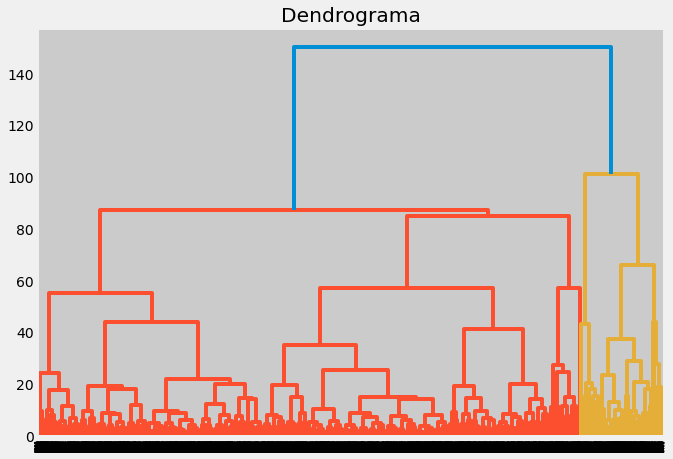

In [75]:
# Representación gráfica del clúster jerárquico
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(pca_CJ_df, method='ward'))

<span style='color:blue;font-size:14px'> Utilitzant el criteri de tall per la línia vertical més llarga, es decideix fer el tall hortizontal per el punt 120 (no es construeix el gràfic amb el tall perquè triga bastant). El nombre de clústers resultant és 2.</span>

<span style='color:blue;font-size:20px'> <b> Aplicació del Clustering Aglomeratiu </b> </span>

In [76]:
cluster_aglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
cluster_aglo.fit(pca_CJ_df)

AgglomerativeClustering()

<span style='color:blue;font-size:20px'> <b> Representació 2D dels clústers </b> </span>

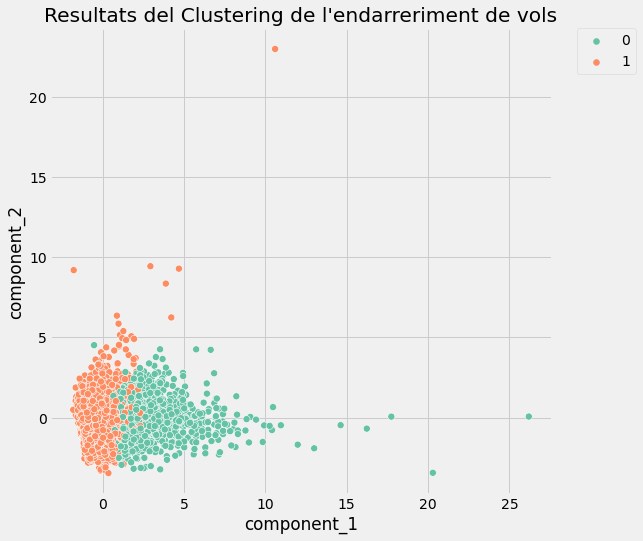

In [77]:
# S'agafen les dues primeres components principals
pcadf_2 = pd.DataFrame(
     pca_CJ_df[:,:2],
     columns=["component_1", "component_2"],
)

pcadf_2["cluster"] = cluster_aglo.labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=50,
    data=pcadf_2,
    hue="cluster",
    palette="Set2",
)

scat.set_title(
    "Resultats del Clustering de l'endarreriment de vols"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

<span style='color:blue;font-size:14px'> El clúster 0 conglomera la majoria de punts dels clústers 1 i 2 del k-means, i el clúster 1 conglomera la majoria de punts dels clústers 0 i 3. </span>

<span style='color:blue;font-size:20px'> <b> Assignació de Clústers al dataframe original </b> </span>

In [78]:
pcadf_2.head()

,component_1,component_2,cluster
0,-0.582299,0.450530,1
1,-0.923500,0.766760,1
2,1.197423,-0.703549,0
3,0.096774,-2.690326,1
4,-0.687874,-1.120492,1


In [79]:
# Es tornen els index al valors per defecte (0,1,2,...)
dfs_2b = dfs.reset_index()

In [80]:
# S'uneixen la taula original (abans de preprocessar) i la taula PCA
df_final_3 = dfs_2b.join(pcadf_2)
df_final_3 = df_final_3.drop('index',axis=1)
df_final_3.head()

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,VelMitja,Sortida,component_1,component_2,cluster
0,February,Thursday,US,21.0,31.0,CLT,BOS,7.0,12.0,445.71,Tarda,-0.582299,0.450530,1
1,July,Friday,CO,0.0,6.0,JFK,IAH,8.0,24.0,445.13,Mati,-0.923500,0.766760,1
2,April,Friday,XE,72.0,47.0,EWR,ALB,4.0,65.0,286.00,Mati,1.197423,-0.703549,0
3,June,Wednesday,AS,45.0,34.0,SIT,JNU,3.0,17.0,172.73,Tarda,0.096774,-2.690326,1
4,March,Friday,WN,18.0,21.0,LAS,SMF,3.0,12.0,330.83,Tarda,-0.687874,-1.120492,1


<span style='color:blue;font-size:20px'> <b> Anàlisi descriptiu de cada clúster </b> </span>

In [81]:
# Es divideix el dataset en 2, segons el clúster assignat
nivells_cluster_2 = df_final_3['cluster'].unique()
df_ad_2 = []
for i in nivells_cluster_2:
     df_ad_2.append(df_final_3[df_final_3['cluster']==i])

<span style='color:blue;font-size:18px'> <b> Variables categòriques: Freqüència relativa </b> </span>

<span style='color:blue;font-size:16px'> <b> Mesos </b> </span>

In [82]:
# Ordenació dels mesos
mes_ord = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
order = {key: i for i, key in enumerate(mes_ord)}

In [83]:
# Càlcul de les freqüencies relatives ordenat per mes
mesos = []
for i in range(len(df_ad_2)):
    mesos.append((df_ad_2[i]['Month'].groupby(df_ad_2[i]['Month']).count()/(len(df_ad_2[i]['Month']))).reset_index(name='Freq').sort_values(by = ['Month'], key = lambda x: x.map(order)))

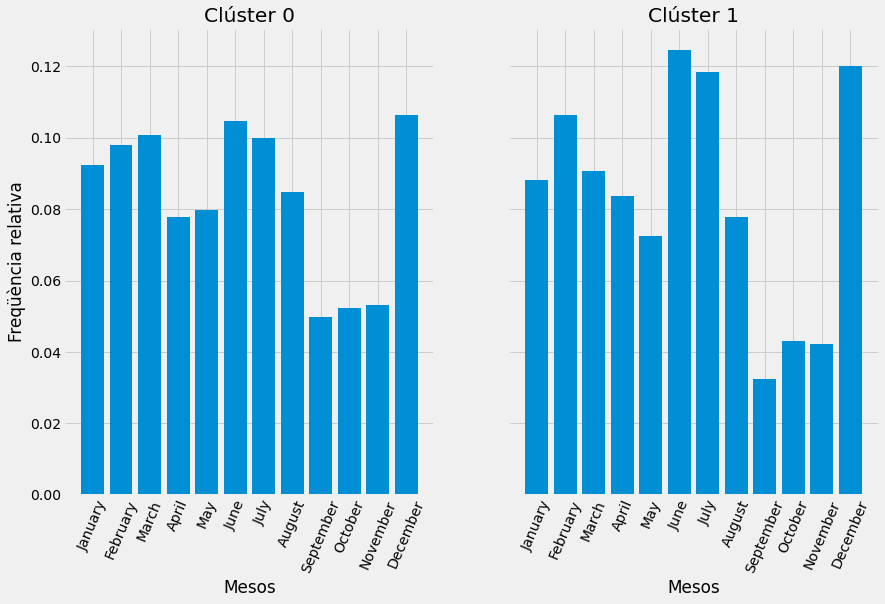

In [84]:
# Barplot de la freqüència relativa dels mesos
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,8))
ax1.bar(mesos[0].Month, mesos[0].Freq)
ax1.set(xlabel='Mesos', ylabel='Freqüència relativa')
ax1.set_title('Clúster 0')
plt.setp(ax1.get_xticklabels(), rotation=67)
ax2.bar(mesos[1].Month, mesos[1].Freq)
ax2.set(xlabel='Mesos')
ax2.set_title('Clúster 1')
plt.setp(ax2.get_xticklabels(), rotation=67)
plt.show()

<span style='color:blue'> Els dos clústers es distribueixen de manera semblant. </span>

<span style='color:blue;font-size:16px'> <b> Dies de la setmana </b> </span>

In [85]:
# Ordenació dels mesos
dia_ord = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
order = {key: i for i, key in enumerate(dia_ord)}

In [86]:
# Càlcul de les freqüencies relatives ordenat per dia
dies = []
for i in range(len(df_ad_2)):
    dies.append((df_ad_2[i]['DayOfWeek'].groupby(df_ad_2[i]['DayOfWeek']).count()/(len(df_ad_2[i]['DayOfWeek']))).reset_index(name='Freq').sort_values(by = ['DayOfWeek'], key = lambda x: x.map(order)))

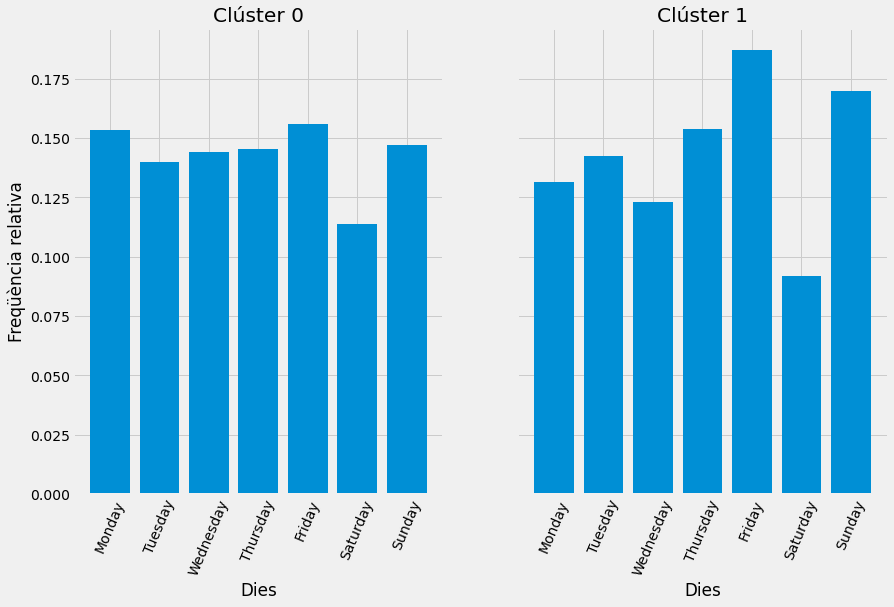

In [87]:
# Barplot de la freqüència relativa dels dies
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,8))
ax1.bar(dies[0].DayOfWeek, dies[0].Freq)
ax1.set(xlabel='Dies', ylabel='Freqüència relativa')
ax1.set_title('Clúster 0')
plt.setp(ax1.get_xticklabels(), rotation=67)
ax2.bar(dies[1].DayOfWeek, dies[1].Freq)
ax2.set(xlabel='Dies')
ax2.set_title('Clúster 1')
plt.setp(ax2.get_xticklabels(), rotation=67)
plt.show()

<span style='color:blue'> En el clúster 0 el dies es distribueixen de manera semblant. En el clúster 1 destaca els divendres i els pocs dissabtes.  </span>

<span style='color:blue;font-size:16px'> <b> Aerolínies </b> </span>

In [88]:
# Càlcul de les freqüencies relatives
UC = []
for i in range(len(df_ad_2)):
    UC.append((df_ad_2[i]['UniqueCarrier'].groupby(df_ad_2[i]['UniqueCarrier']).count()/(len(df_ad_2[i]['UniqueCarrier']))).reset_index(name='Freq').sort_values(by = ['UniqueCarrier']))

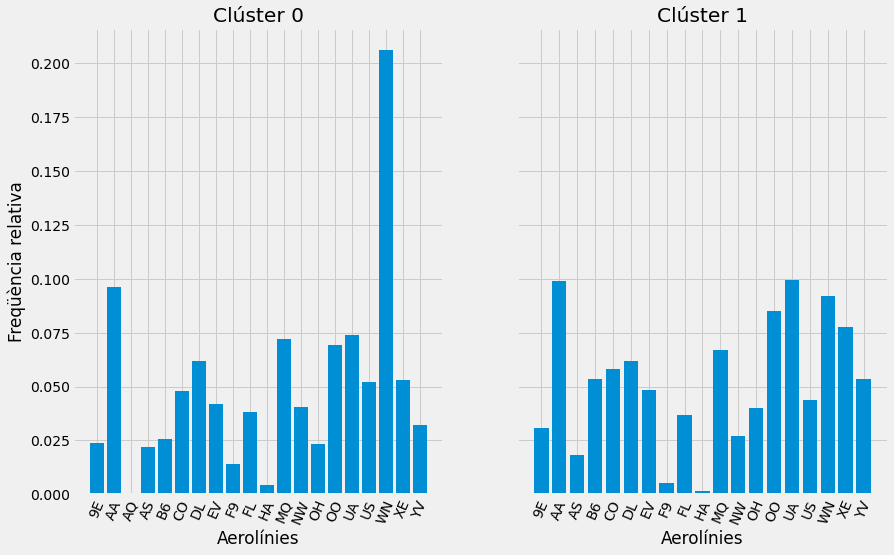

In [89]:
# Barplot de la freqüència relativa de les aerolínies
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,8))
ax1.bar(UC[0].UniqueCarrier, UC[0].Freq)
ax1.set(xlabel='Aerolínies', ylabel='Freqüència relativa')
ax1.set_title('Clúster 0')
plt.setp(ax1.get_xticklabels(), rotation=67)
ax2.bar(UC[1].UniqueCarrier, UC[1].Freq)
ax2.set(xlabel='Aerolínies')
ax2.set_title('Clúster 1')
plt.setp(ax2.get_xticklabels(), rotation=67)
plt.show()

<span style='color:blue'> En el clúster 0 destaca molt l'aerolínia WN. En el clúster 1 destaca les aerolínies UA, YV i XE. </span>

<span style='color:blue;font-size:16px'> <b> Origen </b> </span>

<span style='color:blue'> Com que es tracta d'una categòrica amb molts nivells, es calcula les 5 freqüències relatives més altes en comptes d'utilizar gràfiques. </span>

In [90]:
# Freqüència relativa dels 5 origens amb més ocurrencies
for i in range(len(df_ad_2)):
    print((df_ad_2[i]['Origin'].groupby(df_ad_2[i]['Origin']).count()/(len(df_ad_2[i]['Origin']))).sort_values(ascending=False)[:5])
    print('-----')

Origin
ATL    0.067896
ORD    0.063977
DFW    0.050490
DEN    0.040115
LAX    0.033545
Name: Origin, dtype: float64
-----
Origin
ORD    0.092075
ATL    0.077736
JFK    0.057358
EWR    0.048302
DFW    0.032453
Name: Origin, dtype: float64
-----


<span style='color:blue'> Les primeres posicions són ATL i ORD, que s'intercanvien per a cada clúster. La diferència entre clústers es troba a partir de la tercera posició: en el clúster 0 apareixen origens diferents que en el clúster 1. </span>

<span style='color:blue;font-size:16px'> <b> Destinació </b> </span>

<span style='color:blue'> Com que es tracta d'una categòrica amb molts nivells, es calcula les 5 freqüències relatives més altes en comptes d'utilizar gràfiques. </span>

In [91]:
# Freqüència relativa de les 5 destinacions amb més ocurrencies
for i in range(len(df_ad_2)):
    print((df_ad_2[i]['Dest'].groupby(df_ad_2[i]['Dest']).count()/(len(df_ad_2[i]['Dest']))).sort_values(ascending=False)[:5])
    print('-----')

Dest
ATL    0.057406
ORD    0.049568
DEN    0.034813
DFW    0.034352
LAX    0.030432
Name: Dest, dtype: float64
-----
Dest
ORD    0.097358
ATL    0.067925
EWR    0.049811
SFO    0.038491
LAX    0.029434
Name: Dest, dtype: float64
-----


<span style='color:blue'> Les primeres posicions són ATL i ORD, que s'intercanvien per a cada clúster. La diferència entre clústers es troba a partir de la tercera posició: en el clúster 0 apareixen destinacions diferents que en el clúster 1. </span>

<span style='color:blue;font-size:16px'> <b> Sortida </b> </span>

In [92]:
# Ordenació dels moments del dia
sort_ord = ['Mati', 'Tarda', 'Nit']
order = {key: i for i, key in enumerate(sort_ord)}

In [93]:
# Freqüència relativa de les sortides
sort = []
for i in range(len(df_ad_2)):
    sort.append((df_ad_2[i]['Sortida'].groupby(df_ad_2[i]['Sortida']).count()/(len(df_ad_2[i]['Sortida']))).reset_index(name='Freq').sort_values(by = ['Sortida'], key = lambda x: x.map(order)))

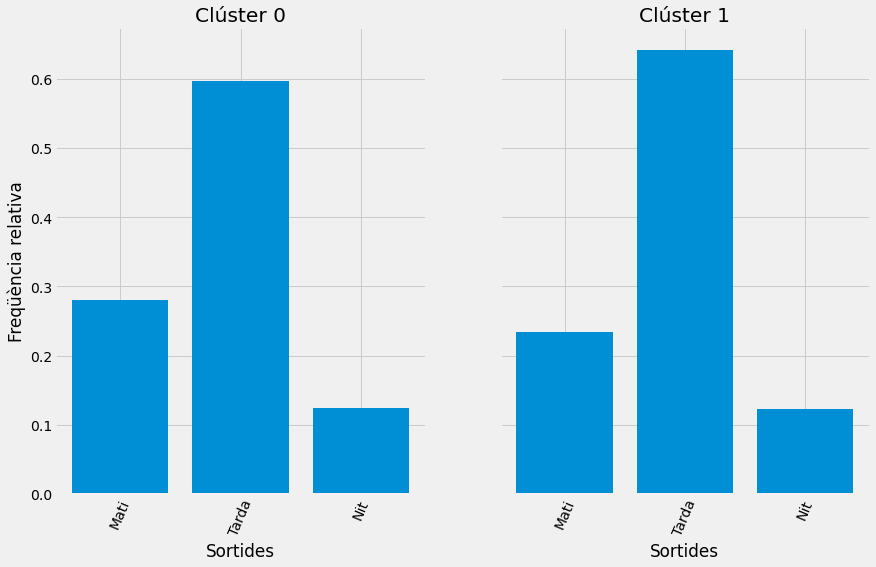

In [94]:
# Barplot de la freqüència relativa de les sortides
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,8))
ax1.bar(sort[0].Sortida, sort[0].Freq)
ax1.set(xlabel='Sortides', ylabel='Freqüència relativa')
ax1.set_title('Clúster 0')
plt.setp(ax1.get_xticklabels(), rotation=67)
ax2.bar(sort[1].Sortida, sort[1].Freq)
ax2.set(xlabel='Sortides')
ax2.set_title('Clúster 1')
plt.setp(ax2.get_xticklabels(), rotation=67)
plt.show()

<span style='color:blue'> Els clústers son iguals. Això vol dir que aquesta variable no aporta res al k-means.  </span>

<span style='color:blue;font-size:18px'> <b> Variables numèriques: mitjana i mediana </b> </span>

<span style='color:blue;font-size:16px'> <b> ArrDelay </b> </span>

In [95]:
for i in range(len(df_ad_2)):
    print('Clúster '+str(i))
    print('Mitjana ArrDelay : ', round(df_ad_2[i]['ArrDelay'].mean(),2))
    print('Mediana ArrDelay:', (df_ad_2[i]['ArrDelay'].median()))
    print('-----')

Clúster 0
Mitjana ArrDelay :  26.71
Mediana ArrDelay: 20.0
-----
Clúster 1
Mitjana ArrDelay :  150.65
Mediana ArrDelay: 135.0
-----


<span style='color:blue'> Els valors son molt diferents. El clúster 0 representa els vols amb menys endarreriment a l'arribada i per al clúster 1 el cas contrari.  </span>

<span style='color:blue;font-size:16px'> <b> DepDelay </b> </span>

In [96]:
for i in range(len(df_ad_2)):
    print('Clúster '+str(i))
    print('Mitjana DepDelay: ', round(df_ad_2[i]['DepDelay'].mean(),2))
    print('Mediana DepDelay:', (df_ad_2[i]['DepDelay'].median()))
    print('-----')

Clúster 0
Mitjana DepDelay:  29.33
Mediana DepDelay: 21.0
-----
Clúster 1
Mitjana DepDelay:  137.68
Mediana DepDelay: 128.0
-----


<span style='color:blue'> Els valors son molt diferents. El clúster 0 representa els vols amb menys endarreriment a la sortida i per al clúster 1 el cas contrari.  </span>

<span style='color:blue;font-size:16px'> <b> TaxiIn </b> </span>

In [97]:
for i in range(len(df_ad_2)):
    print('Clúster '+str(i))
    print('TaxiIn: ', round(df_ad_2[i]['TaxiIn'].mean(),2))
    print('TaxiIn:', (df_ad_2[i]['TaxiIn'].median()))
    print('-----')

Clúster 0
TaxiIn:  6.72
TaxiIn: 5.0
-----
Clúster 1
TaxiIn:  7.58
TaxiIn: 6.0
-----


<span style='color:blue'> El clúster 0 és el que té, en mitjana, menys TaxiIn, encara que comparat amb els clústers del k-means, la diferència no es gaire gran. </span>

<span style='color:blue;font-size:16px'> <b> TaxiOut </b> </span>

In [98]:
for i in range(len(df_ad_2)):
    print('Clúster '+str(i))
    print('TaxiOut: ', round(df_ad_2[i]['TaxiOut'].mean(),2))
    print('TaxiOut:', (df_ad_2[i]['TaxiOut'].median()))
    print('-----')

Clúster 0
TaxiOut:  16.23
TaxiOut: 14.0
-----
Clúster 1
TaxiOut:  31.51
TaxiOut: 19.0
-----


<span style='color:blue'> El clúster 0 és el que té, en mitjana, menys TaxiOut, encara que comparat amb els clústers del k-means, la diferència no es gaire gran. </span>

<span style='color:blue;font-size:16px'> <b> Velocitat Mitjana </b> </span>

In [99]:
for i in range(len(df_ad_2)):
    print('Clúster '+str(i))
    print('VelMitja: ', round(df_ad_2[i]['VelMitja'].mean(),2))
    print('VelMitja:', (df_ad_2[i]['VelMitja'].median()))
    print('-----')

Clúster 0
VelMitja:  398.91
VelMitja: 405.93
-----
Clúster 1
VelMitja:  378.29
VelMitja: 388.24
-----


<span style='color:blue'> El clúster 0 és el que té, en mitjana, més Velocitat Mitjana. </span>

<span style='color:blue;font-size:20px'> <b> Conclusions: descripció dels clústers </b> </span>

<span style='color:blue;font-size:18px'> <b> Clúster 0 </b> </span>

<span style='color:blue;font-size:16px'> Es caracterítza per agrupar vols de manera distribuïda per mesos, amb predomini de vols de l'aerolínia WN. En mitjana, el vols s'endarrereixen menys que la resta de clústers i això s'explica perquè, en mitjana, té els vols més ràpids. A més, te els valors de TaxiIn i TaxiOut més petits que l'altra clúster.  </span>

<span style='color:blue;font-size:18px'> <b> Clúster 1 </b> </span>

<span style='color:blue;font-size:16px'> Es caracterítza per agrupar vols de vacances (Juny, Juliol i Decembre), amb predomini de vols de les aerolínies UA, YV i XE. Per a les variables numèriques, es el cas contrari al clúster 0: conglomera els vols amb més endarreriment, valors de TaxiIn i TaxiOut alts i vols menys ràpids.  </span>

## Exercici 3
__Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.__

<span style='color:blue;font-size:18px'> <b> Coeficient silueta </b> </span>

In [100]:
# Cálculo del coeficiente silueta para cada algoritmo
kmeans_silhouette = silhouette_score(pca_32_df, pca_32_kmeans.labels_).round(2)
clust_aglo_silhouette = silhouette_score(pca_CJ_df, cluster_aglo.labels_).round(2)
print('Coeficient silueta K-means: ', kmeans_silhouette)
print('Coeficient silueta Clúster Aglomeratiu: ', clust_aglo_silhouette)

Coeficient silueta K-means:  0.11
Coeficient silueta Clúster Aglomeratiu:  0.48


<span style='color:blue;font-size:16px'> Segons el coeficient silueta, el clúster aglomeratiu ha conglomerat millor el seu dataframe (acceptable) que no pas el k-means (quasi indiferent). Cal remarcar que es tracten de dos datraframes diferents (ja que s'han realitzat dos ACP diferents). </span>

<span style='color:blue;font-size:18px'> <b> Índex de Calinski-Harabasz </b> </span>

In [101]:
CH_kmeans = metrics.calinski_harabasz_score(pca_32_df, pca_32_kmeans.labels_)
CH_aglo = metrics.calinski_harabasz_score(pca_CJ_df, cluster_aglo.labels_)
print('Calinski-Harabasz K-means: ', round(CH_kmeans, 2))
print('Calinski-Harabasz Aglomeratiu: ', round(CH_aglo, 2))

Calinski-Harabasz K-means:  1298.0
Calinski-Harabasz Aglomeratiu:  2925.73


<span style='color:blue;font-size:16px'> Que el valor del CH Aglomeratiu sigui més gran que el de K-means indica que aquets primer ha format clústers millor definits que el segon.  </span>

<span style='color:blue;font-size:18px'> <b> Índex de Davies-Bouldin </b> </span>

In [102]:
DB_kmeans = davies_bouldin_score(pca_32_df, pca_32_kmeans.labels_)
DB_aglo = davies_bouldin_score(pca_CJ_df, cluster_aglo.labels_)
print('Davies-Bouldin K-means: ', round(DB_kmeans, 2))
print('Davies-Bouldin Aglomeratiu: ', round(DB_aglo, 2))

Davies-Bouldin K-means:  2.0
Davies-Bouldin Aglomeratiu:  1.33


<span style='color:blue;font-size:16px'> Valors propers a 0 indica millors particions. Per tant, el clúster aglomeratiu té millors conglomerats que el k-means.  </span>

<span style='color:blue;font-size:22px'> <b> Exercici extra: millor k segons diferents mètriques </b> </span>

In [103]:
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 1234,}

# Métricas de evaluación
silhouette_scores = []
CH_scores = []
DB_scores = []

for n in range(2, 11):
 
    kmeans = KMeans(n_clusters=n, **kmeans_kwargs)
    pca_32_kmeans = kmeans.fit(pca_32_df)
    
    silhouette_coef = silhouette_score(pca_32_df, pca_32_kmeans.labels_,)
    CH_ind = metrics.calinski_harabasz_score(pca_32_df, pca_32_kmeans.labels_,)
    DB_ind = davies_bouldin_score(pca_32_df, pca_32_kmeans.labels_,)
    
    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    CH_scores.append(CH_ind)
    DB_scores.append(DB_ind)

<span style='color:blue;font-size:18px'> <b> Coeficient silueta </b> </span>

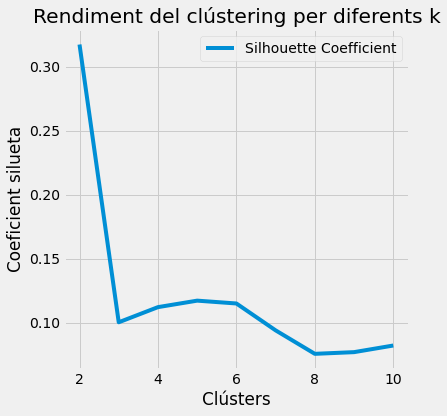

In [104]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)

plt.xlabel("Clústers")
plt.ylabel("Coeficient silueta")
plt.legend()
plt.title("Rendiment del clústering per diferents k")
plt.tight_layout()
plt.show()

<span style='color:blue;font-size:18px'> <b> Índex de Calinski-Harabasz </b> </span>

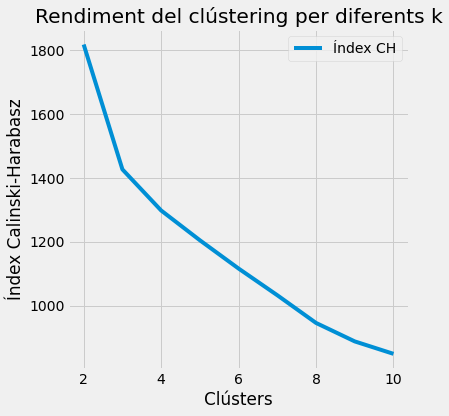

In [105]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    CH_scores,
    c="#008fd5",
    label="Índex CH",
)

plt.xlabel("Clústers")
plt.ylabel("Índex Calinski-Harabasz")
plt.legend()
plt.title("Rendiment del clústering per diferents k")
plt.tight_layout()
plt.show()

<span style='color:blue;font-size:18px'> <b> Índex de Davies-Bouldin </b> </span>

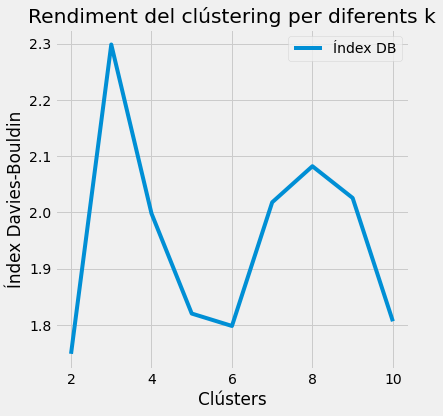

In [106]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    DB_scores,
    c="#008fd5",
    label="Índex DB",
)

plt.xlabel("Clústers")
plt.ylabel("Índex Davies-Bouldin")
plt.legend()
plt.title("Rendiment del clústering per diferents k")
plt.tight_layout()
plt.show()

<span style='color:blue;font-size:18px'> <b> Conclusions </b> </span>

<span style='color:blue;font-size:16px'> En tots els casos, el millor valor de k per obtenir el millor rendiment és k=2, es a dir, dos clústers. </span>